<b> A Computaional Mathematics II project by <i> Kojo Nketia, Richard Atidigah, Benedicta Mordzifah </i> and <i> Prince Oppong Baidoo

# <center> <u> On Lorenz Equation </u> </center>


## <center> <u> Question <u> </center>

The Lorenz equations is an example of a simple nonlinear differential equations model based on atmospheric fluid dynamics created by American meterologist Edward Lorenz. The equations is given as <br>

$ \dfrac{dx}{dt} = - \sigma x + \sigma y $  <br> <br>
$ \dfrac{dy}{dt} = rx - y -xz $  <br> <br>
$ \dfrac{dz}{dt} = -bz + xy $


These equations relate the intensity of the atmospheric fluid motion $ x $ to the temperature variation $ y $ and $ z $ in the horizontal and vertical directions, respectively. Using $ \sigma = 10, b = \dfrac{8}{3}, r = 28 $ <br> <br>
(a) Use the Runge-Kutta method of order 4 (RK4) to obtain solutions for these equations for $ 0 \leq t \leq 20. $ Let $ x(0) = y(0) = z(0) = 5 $ and $ h = 0.01 $ <br> <br>
(b) Plot the solution in the $ t - x $ plane. <br> <br>
(c) Overlay the solution on the same plot using a slightly perturbed initial condition $ x(0) = 5.001 $, $ y = z = 5 $ <br> <br>
(d) Plot the solution of (a) in the $ x - y - z $ space. <br> <br>
(e) Plot the solution of (a) in the $ x - y $ <br> <br>
(f) Plot the solution of (a) in the $ x - z $ <br> <br>
(g) Plot the solution of (a) in the $ y - z $ 

### About Lorenz Equation

* <b> Nonlinear </b> - The existence of $ xy $ and $ xz $ in the equations makes it nonlinear, where $ x,y$ and $z$ are dependent variables.
* <b> Symmetric </b> - Equations are invariant under $ \big( x(t),y(t) \big) \rightarrow \big( -x(t),-y(t) \big) $. Therefore, if $ \big( x(t),y(t),z(t) \big) $ is a solution then $ \big( -x(t),-y(t),z(t) \big) $ is also a solution.

### <center> Runge Kutta's Method Of Order Four (RK4) 

The Runge-Kutta's method of order four used in finding solutions to an Intial Value Problem $ y^{\prime} = f(t,y) $ with $ y(t_{0}) = y_{0} = \alpha $ numerically is done by <br> <br>
First, calculating successively $ K_{1},K_{2},K_{3} $ and $ K_{4} $ with a step size $ h $ and this is given by <br>
$ K_{1} = hf(t_{i},y_{i}) $ <br> <br>
$ K_{2} = hf(t_{i} + \frac{1}{2}h,y_{i} + \frac{1}{2}K_{1} ) $ <br> <br>
$ K_{3} = hf(t_{i} + \frac{1}{2}h,y_{i} + \frac{1}{2}K_{2} ) $ <br> <br>
$ K_{4} = hf(t_{i} + h,y_{i} + K_{3} ) $ <br> <br>
Then finally compute, <br>
$ y_{i+1} = y_{i} + \dfrac{1}{6}(K_{1} + 2K_{2} + 2K_{3} + K_{4}) $

The Runge-Kutta's method of order four used in finding solutions to an Intial Value Problem 
$
    y^{\prime} = f(t,y) 
$
with $ y(t_{0}) = y_{0} = \alpha $ numerically is done by <br> <br>
First, calculating successively $ K_{1},K_{2},K_{3} $ and $ K_{4} $ with a step size $ h $ and this is given by  
$$ K_{1} = hf(t_{i},y_{i}) $$
$$ K_{2} = hf \left(t_{i} + \frac{1}{2}h,y_{i} + \frac{1}{2}K_{1} \right) $$
$$ K_{3} = hf \left(t_{i} + \frac{1}{2}h,y_{i} + \frac{1}{2}K_{2} \right) $$
$$ K_{4} = hf \left(t_{i} + h,y_{i} + K_{3} \right) $$

Then finally compute, 
$$ y_{i+1} = y_{i} + \dfrac{1}{6}(K_{1} + 2K_{2} + 2K_{3} + K_{4}) $$

## <center> <u> Solution </u> </center>

### <center> (a) </center>

The above systems of equations can be expressed in the compact form;
$ \begin{bmatrix} x^{\prime} \\ y^{\prime} \\ z^{\prime} \end{bmatrix} $ = $ \begin{bmatrix} - 10 x + 10 y \\ 28x - y -xz \\ -\dfrac{8}{3}z + xy \end{bmatrix} $, when the values of $ \sigma,b $ and $ r $ have been substituted into it. <br> <br>
* It can also be represented as $ Y^{\prime} = F(t,x,y,z) $, where $ Y^{\prime} = \begin{bmatrix} x^{\prime} \\ y^{\prime} \\ z^{\prime} \end{bmatrix} $ and $ F(t,x,y,z) =  \begin{bmatrix} - 10 x + 10 y \\ 28x - y -xz \\ -\dfrac{8}{3}z + xy \end{bmatrix} $. <br> <br>
* Then, we solve for the values of $ x,y,z  $ by finding the value of $ Y $ numerically.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# This function takes in the inputs;
# a = start point
# b = endpoint
# initials = initial values (in a list). Eg. [a0,b0,c0]
# F = the function of x, y and z
# h = step size
# This complied code works for F (function) that is independent of t

def fourth_order_runge_kutta_for_three_systems(a,b,initials,F,h):
    import numpy as np
    t = np.arange(a,b+h,h)
    Y = np.zeros((3,(len(t))))
    Y[:,0] = initials
    
    for i in range(0,len(t)-1):
        K1 = F(Y[:,i])
        values_for_K2 = Y[:,i] + (h/2)*K1
        K2 = F(values_for_K2)
        values_for_K3 = Y[:,i] + (h/2)*K2
        K3 = F(values_for_K3)
        values_for_K4 = Y[:,i] + (h)*K3
        K4 = F(values_for_K4)
         
        Y[:,i+1] = Y[:,i] + (h/6)*(K1 + 2*K2 + 2*K3 + K4)
    
    return Y

In [3]:
# We define F(x,y,z) by

def F(list):
    import numpy as np
    x, y, z = list[0], list[1], list[2]
    f1 = -10*x + 10*y
    f2 = 28*x - y - x*z
    f3 = (-8/3)*z + x*y
    
    return np.array([f1,f2,f3])

Given $ 0 \leq t \leq 20 $ and $  h = 0.01 $. 
The solutions for the equations given, using the Runge-Kutta method of order 4, are $ Y = \begin{bmatrix} x \\ y \\ z \end{bmatrix} $

In [4]:
fourth_order_runge_kutta_for_three_systems(0,20,[5,5,5],F,0.01)

array([[  5.        ,   5.05303394,   5.20528407, ...,  -7.07679397,
         -7.64660676,  -8.25245359],
       [  5.        ,   6.09523759,   7.19444295, ..., -12.59126215,
        -13.52711595, -14.48561349],
       [  5.        ,   5.14331846,   5.34400495, ...,  13.21406796,
         13.81520759,  14.55071828]])

In [5]:
fourth_order_runge_kutta_for_three_systems(0,20,[5,5,5],F,0.01)[:,:5]

array([[5.        , 5.05303394, 5.20528407, 5.44856814, 5.77700404],
       [5.        , 6.09523759, 7.19444295, 8.3152935 , 9.47214525],
       [5.        , 5.14331846, 5.34400495, 5.61072608, 5.95539129]])

* The solutions are <br> 
$ \begin{bmatrix} x \\ y \\ z \end{bmatrix} = \begin{bmatrix} 5 & 5.05303394 & 5.20528407 & 5.44856814 & 5.77700404 & 6.18647114 & \cdots \ \ \ \\ 5 & 6.09523759 & 7.19444295 & 8.3152935 & 9.47214525 & 10.67591607 & \cdots \ \ \ \\  5 & 5.14331846 & 5.34400495 & 5.61072608 & 5.95539129 & 6.39306221 & \cdots \ \ \ \end{bmatrix} $ <br> <br>
$ \begin{bmatrix} Y \end{bmatrix} = \begin{bmatrix} \ \ Y_{0} & \ \ \ \ \ \  Y_{1} & \ \ \ \ \ \ \ \ \ \ \ \ \ \ Y_{2} & \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ \ Y_{3} & \ \ \ \ \ \ \ \ \ \ \ \ \ \ Y_{4} & \ \ \ \ \ \ \ \ \ \ \ \ \ \ Y_{5} & \ \ \ \  \ \ \ \ \ \ \ \ \cdots \end{bmatrix} $

In [6]:
# ----------------- Euler's method function ----------------------------

def euler(a,b,h,y0,f):
    import numpy as np
    t = np.arange(a,b+h,h)
    y = (np.zeros(len(t))).tolist()
    y.insert(0,y0)
    
    for i in range(0,len(t)):
        y[i+1] = y[i] + h*f(t[i],y[i])
    
    return y

# --------------- Runge-Kutta's method (order 4) -----------------------

def runge_kutta(a,b,h,y0,f):
    import numpy as np
    t = np.arange(a,b+h,h)
    y = (np.zeros(len(t))).tolist()
    y.insert(0,y0)
    
    
    for i in range(0, len(t)):
        K1 = h*f(t[i], y[i])
        K2 = h*f(t[i] + (h/2), y[i]+ (K1/2))
        K3 = h*f(t[i] + (h/2), y[i]+ (K2/2))
        K4 = h*f(t[i] + h, y[i] + K3)
        
        y[i+1] = y[i] + (K1 + 2*K2 + 2*K3 + K4)/6
        
    return y

#### Why Runge-Kutta's Method of order 4 is reliable in finding approximate solutions to ODEs

* The graphs of the approximate RK4's solution and exact solution are almost indistinguishable as compared to other methods, as illustrated below

<>:21: SyntaxWarning: invalid escape sequence '\p'
<>:21: SyntaxWarning: invalid escape sequence '\p'
C:\Users\User\AppData\Local\Temp\ipykernel_18924\1887797.py:21: SyntaxWarning: invalid escape sequence '\p'
  plt.text(1.5,2,'$ y^{\prime} = y - t^{2} + 1 $', size=20, color='k')


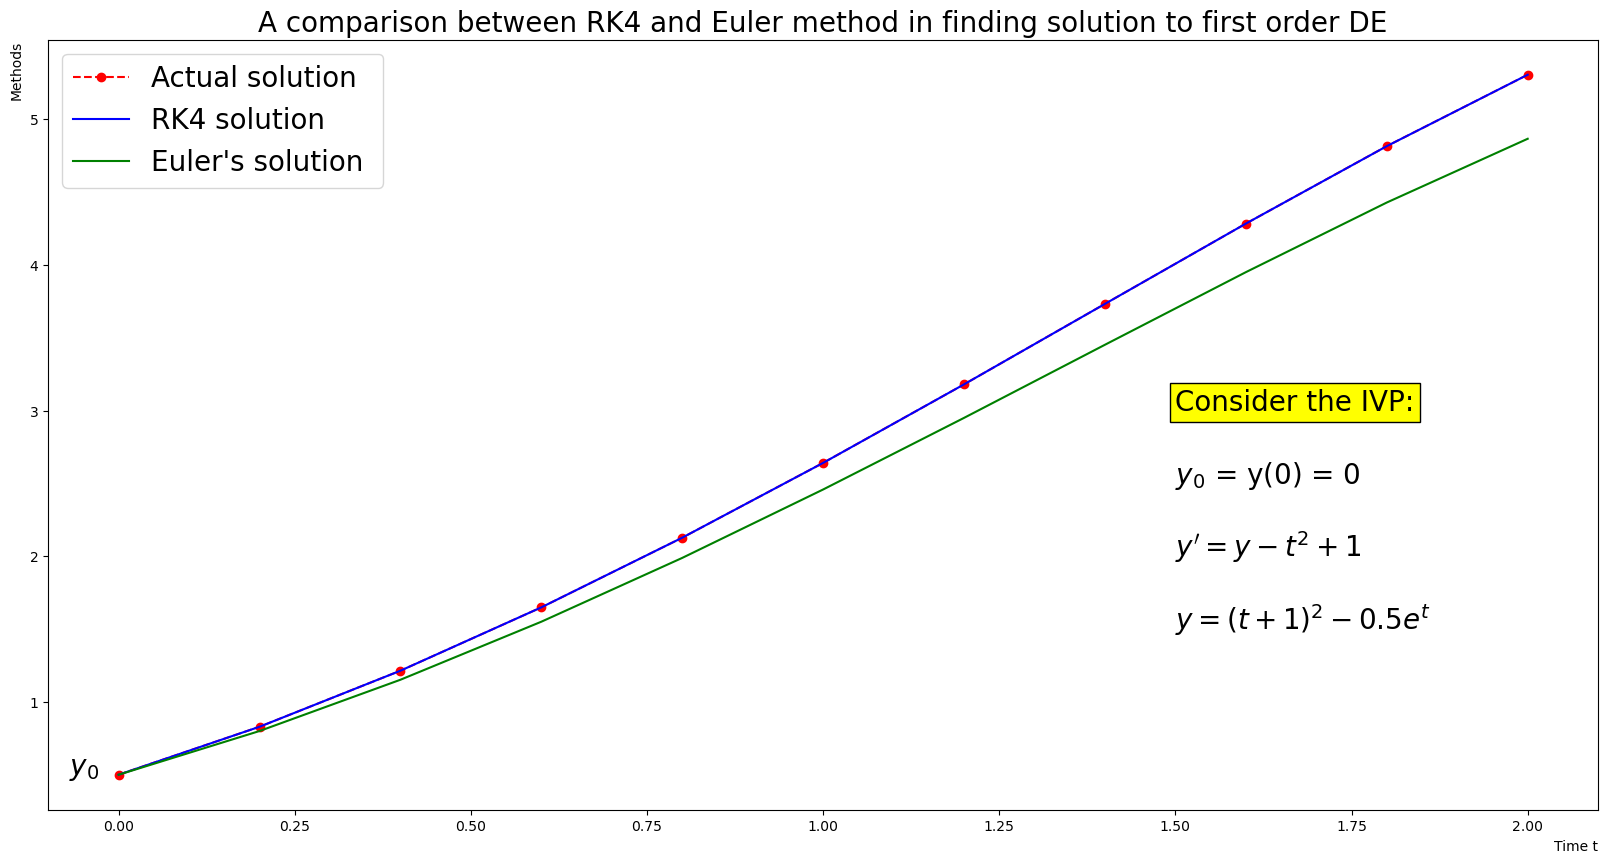

In [7]:
# ---------------- The differential equation f(t,y) ----------------

def f(t,y):
        func_result = y - t**2 + 1
        return func_result

euler_solution = (euler(0,2,0.2,0.5,f))[:-1]
runge_kutta_solution = (runge_kutta(0,2,0.2,0.5,f))[:-1]
actual_solution = lambda t : (t+1)**2 - 0.5*np.exp(t)
t = np.arange(0,2.2,0.2)

plt.figure(figsize = (20,10))
plt.plot(t,actual_solution(t), color = 'red',marker="o",  linestyle="--")
plt.plot(t,runge_kutta_solution, color = 'blue')
plt.plot(t,euler_solution, color = 'green');
plt.text(-0.07,0.5,'$y_{0}$', fontsize = 20);
plt.xlabel('Time t',loc='right');
plt.ylabel('Methods',loc= 'top');
plt.text(1.5,3,'Consider the IVP:',size=20, color='k', bbox ={'facecolor': 'yellow'})
plt.text(1.5,2.5,'$y_{0}$ = y(0) = 0', size=20, color='k')
plt.text(1.5,2,'$ y^{\prime} = y - t^{2} + 1 $', size=20, color='k')
plt.text(1.5,1.5,'$ y = (t+1)^{2} - 0.5e^{t} $', size=20, color='k')
plt.legend(('Actual solution','RK4 solution','''Euler's solution '''), fontsize = 20);
plt.title('A comparison between RK4 and Euler method in finding solution to first order DE',
            fontsize ='20');



### <center> (b) </center>

The graph below is the plot of the solution on the $ t - x $ plane.

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np


t = np.arange(0,20+0.01,0.01)
x = fourth_order_runge_kutta_for_three_systems(0,20,[5,5,5],F,0.01)[0]
y = fourth_order_runge_kutta_for_three_systems(0,20,[5,5,5],F,0.01)[1]
z = fourth_order_runge_kutta_for_three_systems(0,20,[5,5,5],F,0.01)[2]

# when perturbed with initial condition x(0) = 5.001
x_p = fourth_order_runge_kutta_for_three_systems(0,20,[5.001,5,5],F,0.01)[0]

# when t range from 0 to 50
t_star = np.arange(0,50+0.01,0.01)
x_star = fourth_order_runge_kutta_for_three_systems(0,50,[5,5,5],F,0.01)[0]
x_p_star = fourth_order_runge_kutta_for_three_systems(0,50,[5.001,5,5],F,0.01)[0] 

difference = x - x_p

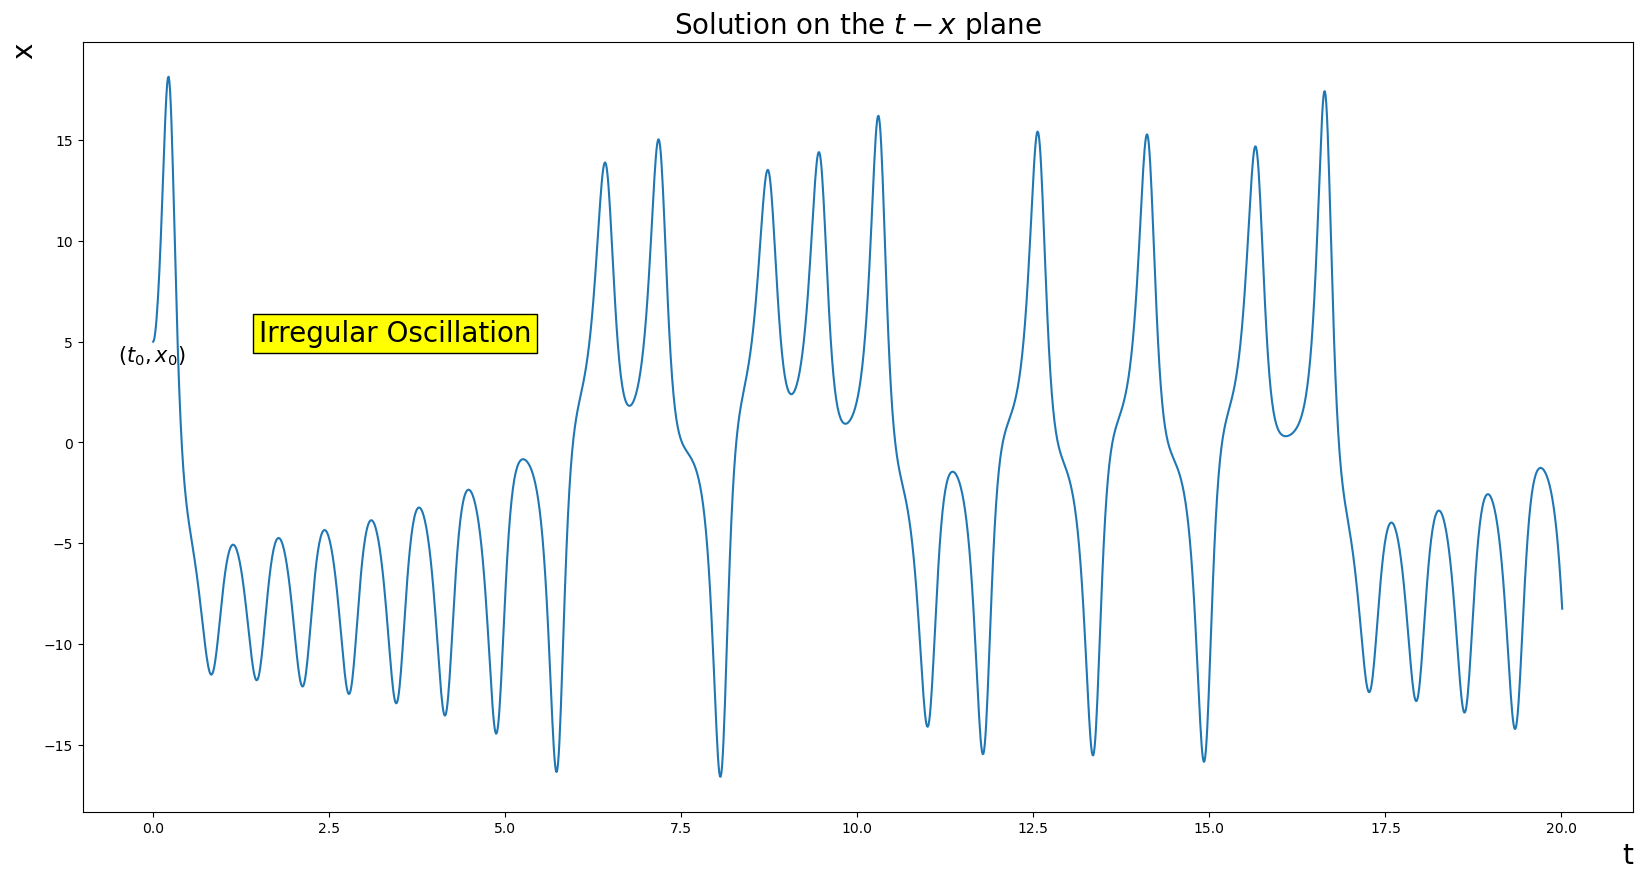

In [9]:
plt.figure(figsize = (20,10))
plt.plot(t,x);
plt.title('Solution on the $t-x$ plane',fontsize=20);
plt.text(1.5,5,'Irregular Oscillation',size=20, color='k', bbox ={'facecolor': 'yellow'})
plt.text(-0.5,4,'$ (t_{0},x_{0}) $', fontsize = 15)
plt.xlabel('t',fontsize = 20, loc = 'right')
plt.ylabel('x', fontsize = 20, loc = 'top');

### <center> (c) </center>

* Slightly perturbed by a small effect 0.001, that is when $ x(0) = 5.001 $ and $ y(0) = z(0) = 5 $, the overlayed solution of the '$ x(0) = 5 $' solution on the '$ x(0) = 5 $' solution with $ y(0) = z(0) = 5 $ is shown below

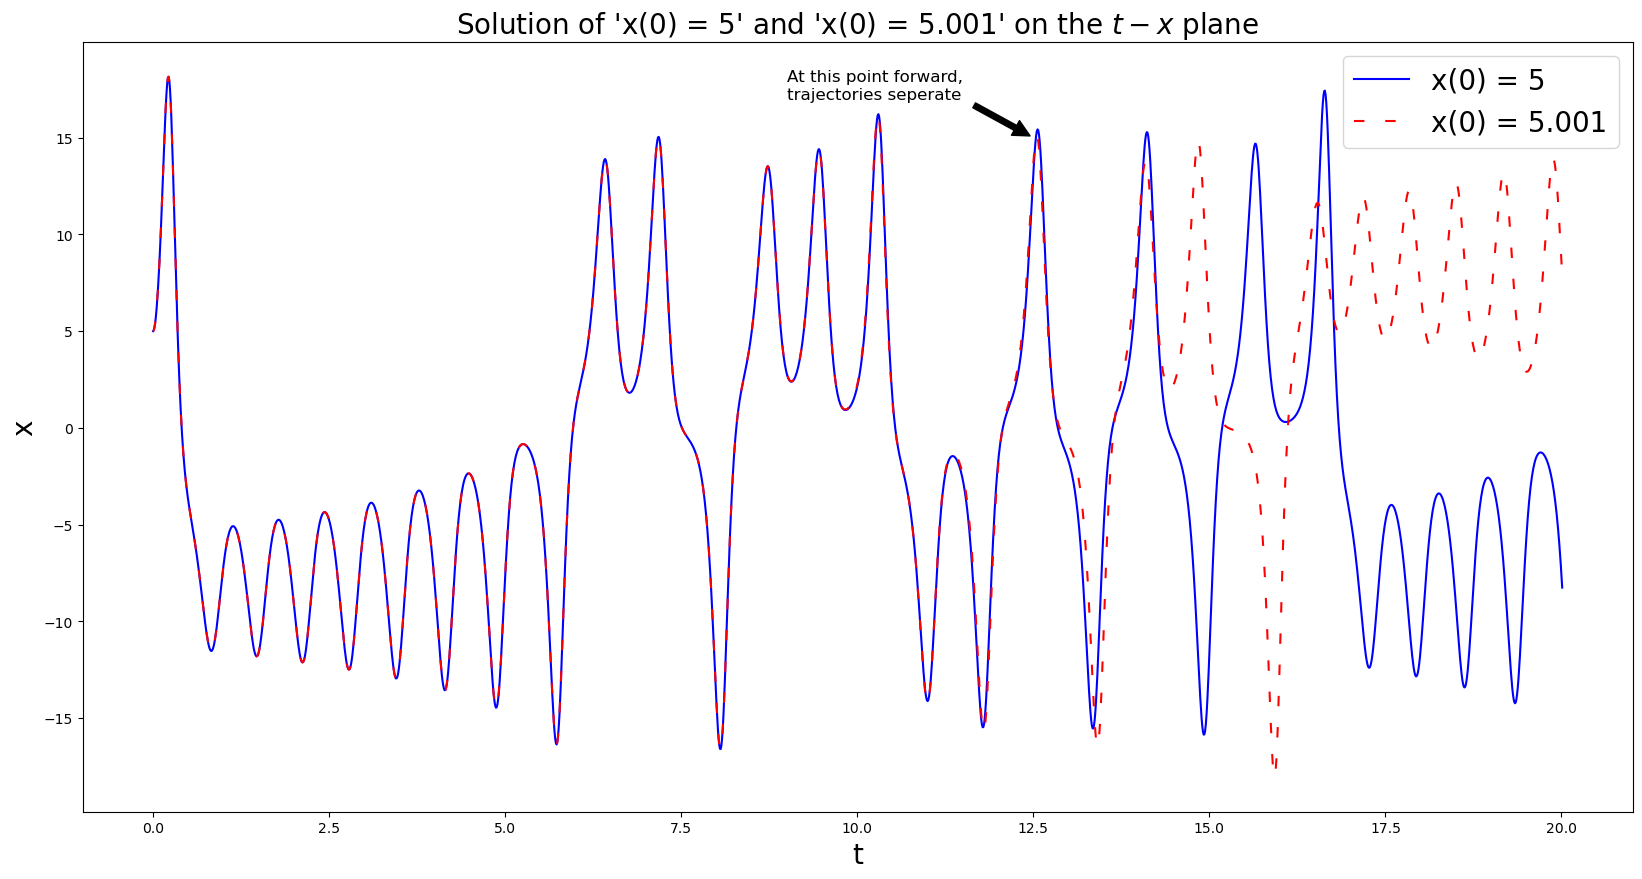

In [10]:
plt.figure(figsize = (20,10))
plt.plot(t,x,color = 'blue',label = 'x(0) = 5',linestyle = 'solid');
plt.plot(t,x_p,color = 'red', label = 'x(0) = 5.001', linestyle=(0,(5,10)));
plt.title('''Solution of 'x(0) = 5' and 'x(0) = 5.001' on the $t-x$ plane''',fontsize=20)
plt.annotate('At this point forward, \ntrajectories seperate', fontsize = 12,
            xy = (12.5,15), xytext = (9,17), arrowprops = dict(facecolor = 'black',shrink = 0.05))

plt.xlabel('t',fontsize = 20)
plt.ylabel('x', fontsize = 20)
plt.legend(fontsize = 20);

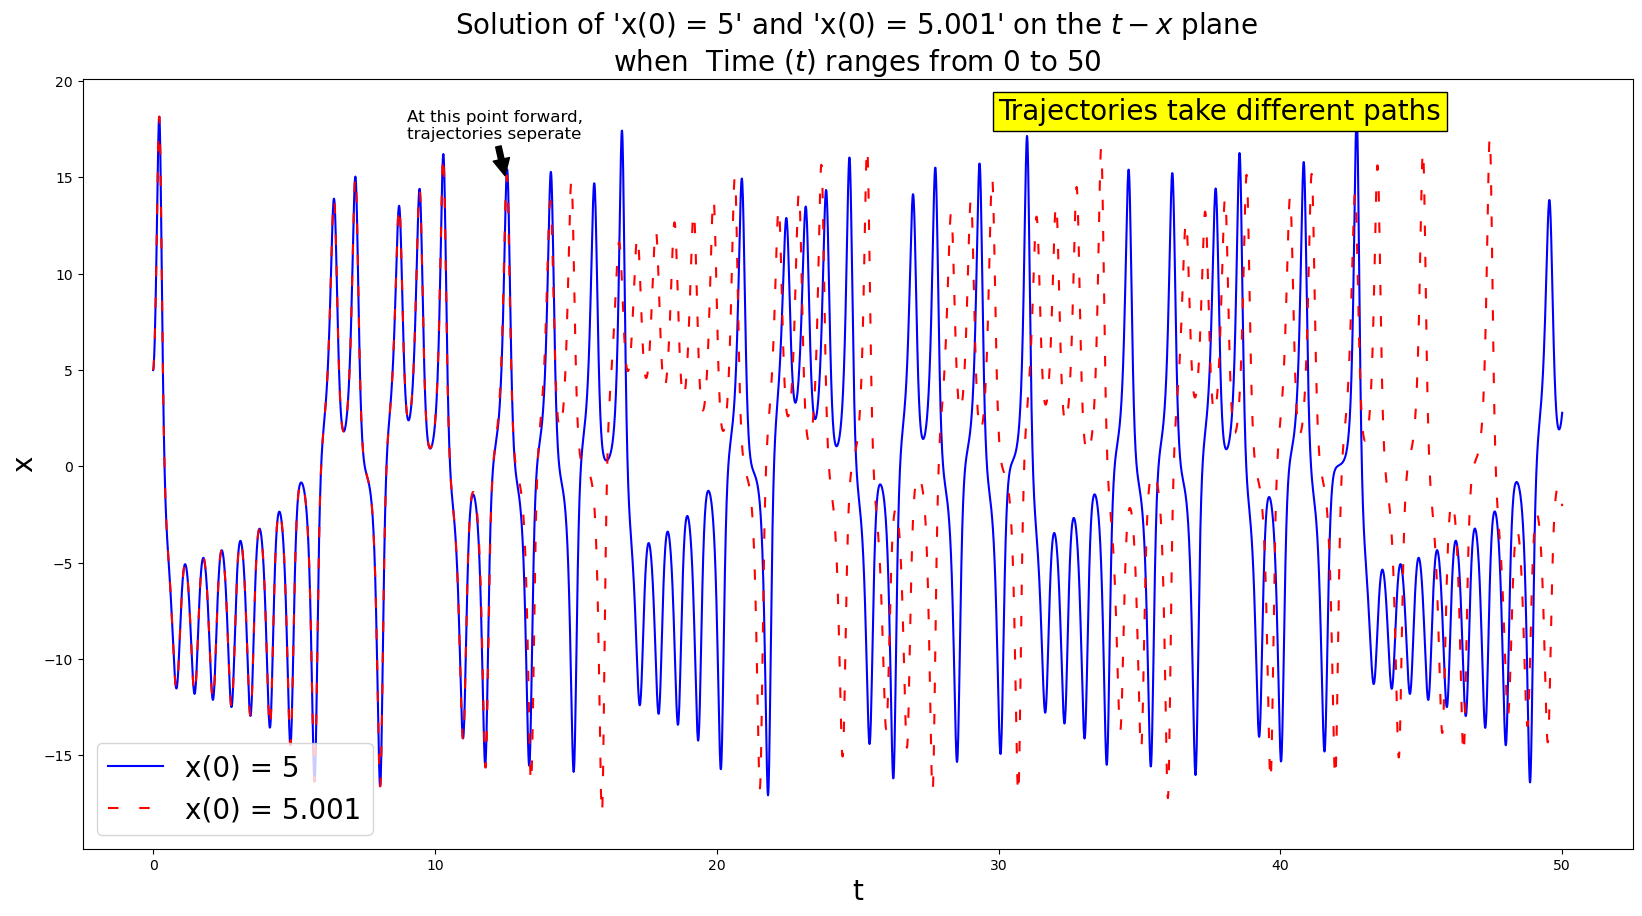

In [11]:
plt.figure(figsize = (20,10))
plt.plot(t_star,x_star,color = 'blue',label = 'x(0) = 5',linestyle = 'solid');
plt.plot(t_star,x_p_star,color = 'red', label = 'x(0) = 5.001', linestyle=(0,(5,10)));
plt.title('''Solution of 'x(0) = 5' and 'x(0) = 5.001' on the $t-x$ plane \nwhen  Time $(t) $ ranges from 0 to 50''',
            fontsize=20)
plt.annotate('At this point forward, \ntrajectories seperate', fontsize = 12,
            xy = (12.5,15), xytext = (9,17), arrowprops = dict(facecolor = 'black',shrink = 0.05))
plt.text(30,18,'Trajectories take different paths',size=20, color='k', bbox ={'facecolor': 'yellow'})

plt.xlabel('t',fontsize = 20)
plt.ylabel('x', fontsize = 20)
plt.legend(fontsize = 20);

<blockquote> <font size = 3> <b> From the graph above, both trajectories started very closely together and later diverged from each other. To say, the motion is <u> highly sensitive to initial conditions</u> which can result in large difference in a later state. The difference between the solution of <i> x </i>  with the initial condition  <i> x(0) = 5 </i> and <i> x(0) = 5.001 </i>  is shown below. 

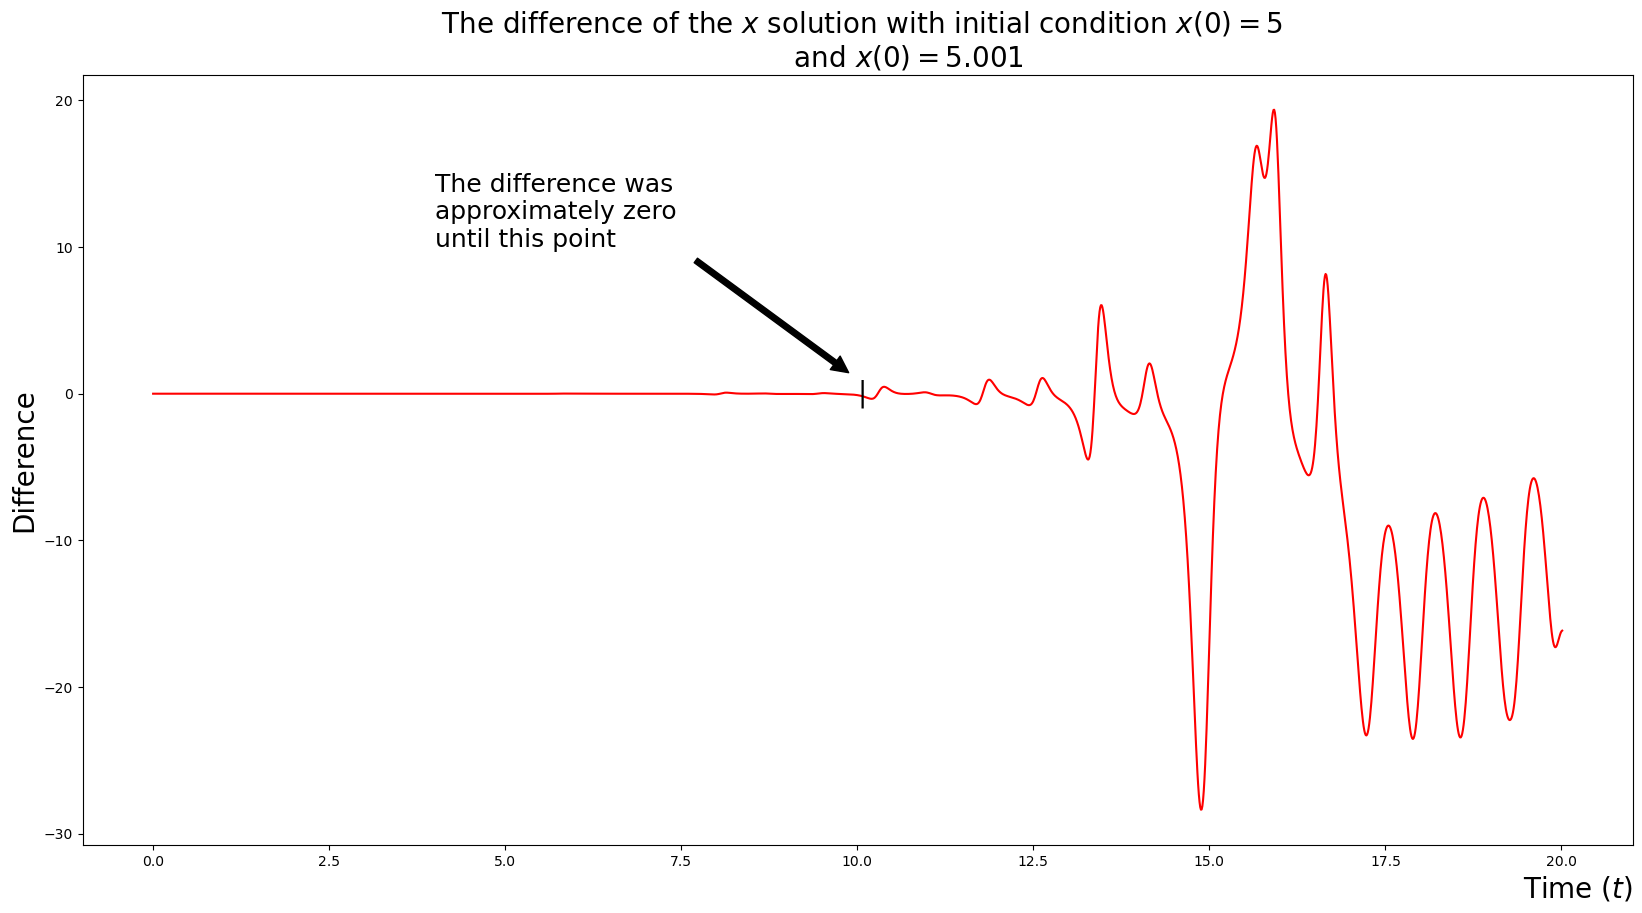

In [12]:
plt.figure(figsize = (20,10))
plt.plot(t,difference,color = 'red')
plt.title(''' The difference of the $ x $ solution with initial condition $x(0) = 5$
            and $x(0) = 5.001$ ''', fontsize =20);
plt.xlabel('Time ($t$)', fontsize = 20, loc = 'right')
plt.ylabel('Difference',fontsize = 20)
plt.annotate('The difference was \napproximately zero \nuntil this point', fontsize = 18,
            xy = (10,1), xytext = (4,10), arrowprops = dict(facecolor = 'black',shrink = 0.05))
plt.text(10,-0.5,'|', size=20, color='k');



### <center> (d) </center>

The 3D space below displays the solution of (a) in the $ x - y - z $ space

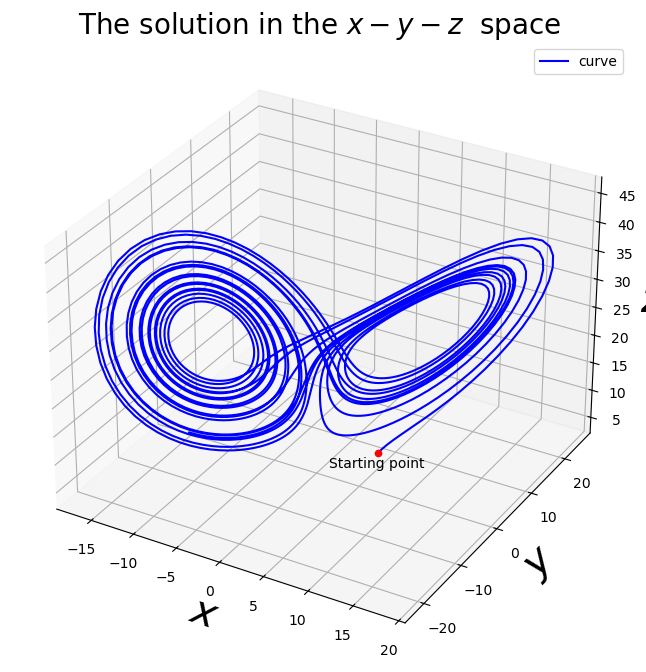

In [18]:
plt.figure(figsize = (8,12))
import matplotlib as mpl

ax = plt.axes(projection='3d')
x = fourth_order_runge_kutta_for_three_systems(0,20,[5,5,5],F,0.01)[0]
y = fourth_order_runge_kutta_for_three_systems(0,20,[5,5,5],F,0.01)[1]
z = fourth_order_runge_kutta_for_three_systems(0,20,[5,5,5],F,0.01)[2]
plt.title('The solution in the $ x - y - z $  space', fontsize = 20)
ax.set_xlabel('$ x $', fontsize=30)
ax.set_ylabel('$ y $', fontsize=30)
ax.yaxis._axinfo['label']['space_factor'] = 3.0
ax.zaxis.set_rotate_label(False) 
ax.set_zlabel('$ z $', fontsize=30, rotation = 0)
ax.plot3D(x,y,z,'blue',label = 'curve');
ax.scatter(5,5,5, color = 'red')
ax.text(1,1,3,'Starting point', size=10, zorder = 1, color='k')
ax.legend()

<blockquote> <font size = 4> <b> The figure above is reffered to as the 'Butterfly Effect' in Chaos Theory

### <center> (e) </center>

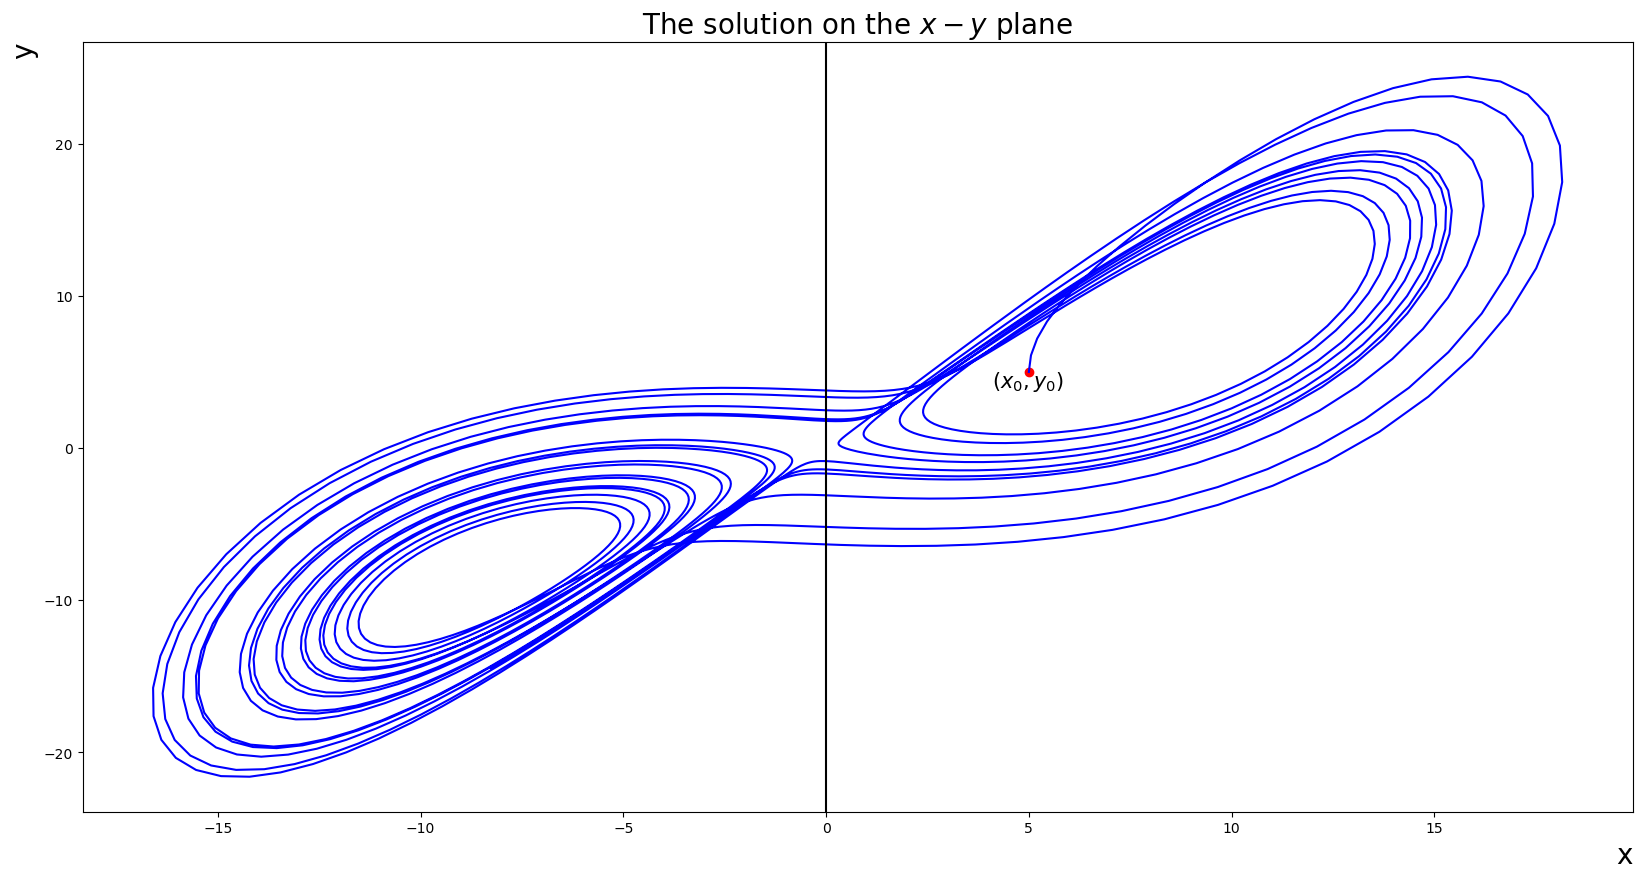

In [14]:
plt.figure(figsize = (20,10))
plt.plot(x,y,color = 'blue',linestyle = 'solid');
plt.scatter(5,5, color = 'red')
plt.title('''The solution on the $ x-y $ plane ''',fontsize=20)
plt.text(4.1,4,'$ (x_{0},y_{0}) $', fontsize = 15)
plt.axvline(x=0, c='black')
plt.xlabel('x',fontsize = 20,loc='right')
plt.ylabel('y', fontsize = 20,loc='top');

### <center> (f) </center>

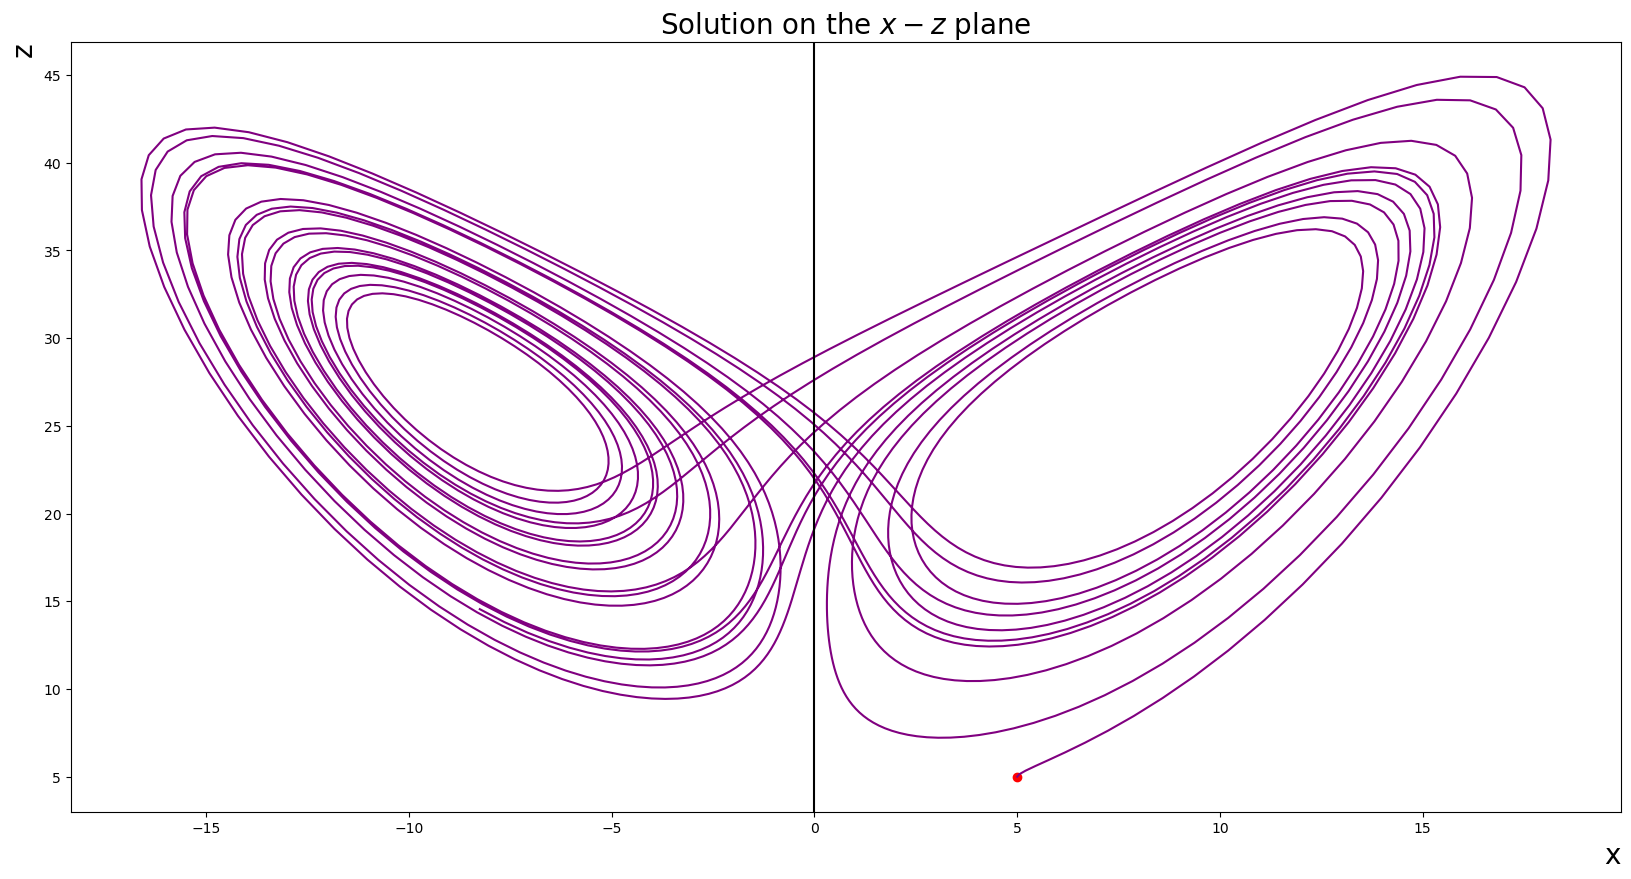

In [15]:
plt.figure(figsize = (20,10))
plt.plot(x,z,color = 'purple',linestyle = 'solid');
plt.scatter(5,5, color = 'red')
plt.title('''Solution on the $ x - z $ plane''',fontsize=20)
plt.axvline(x=0, c='black')
plt.xlabel('x',fontsize = 20,loc='right')
plt.ylabel('z', fontsize = 20,loc='top');

### <center> (f) </center>

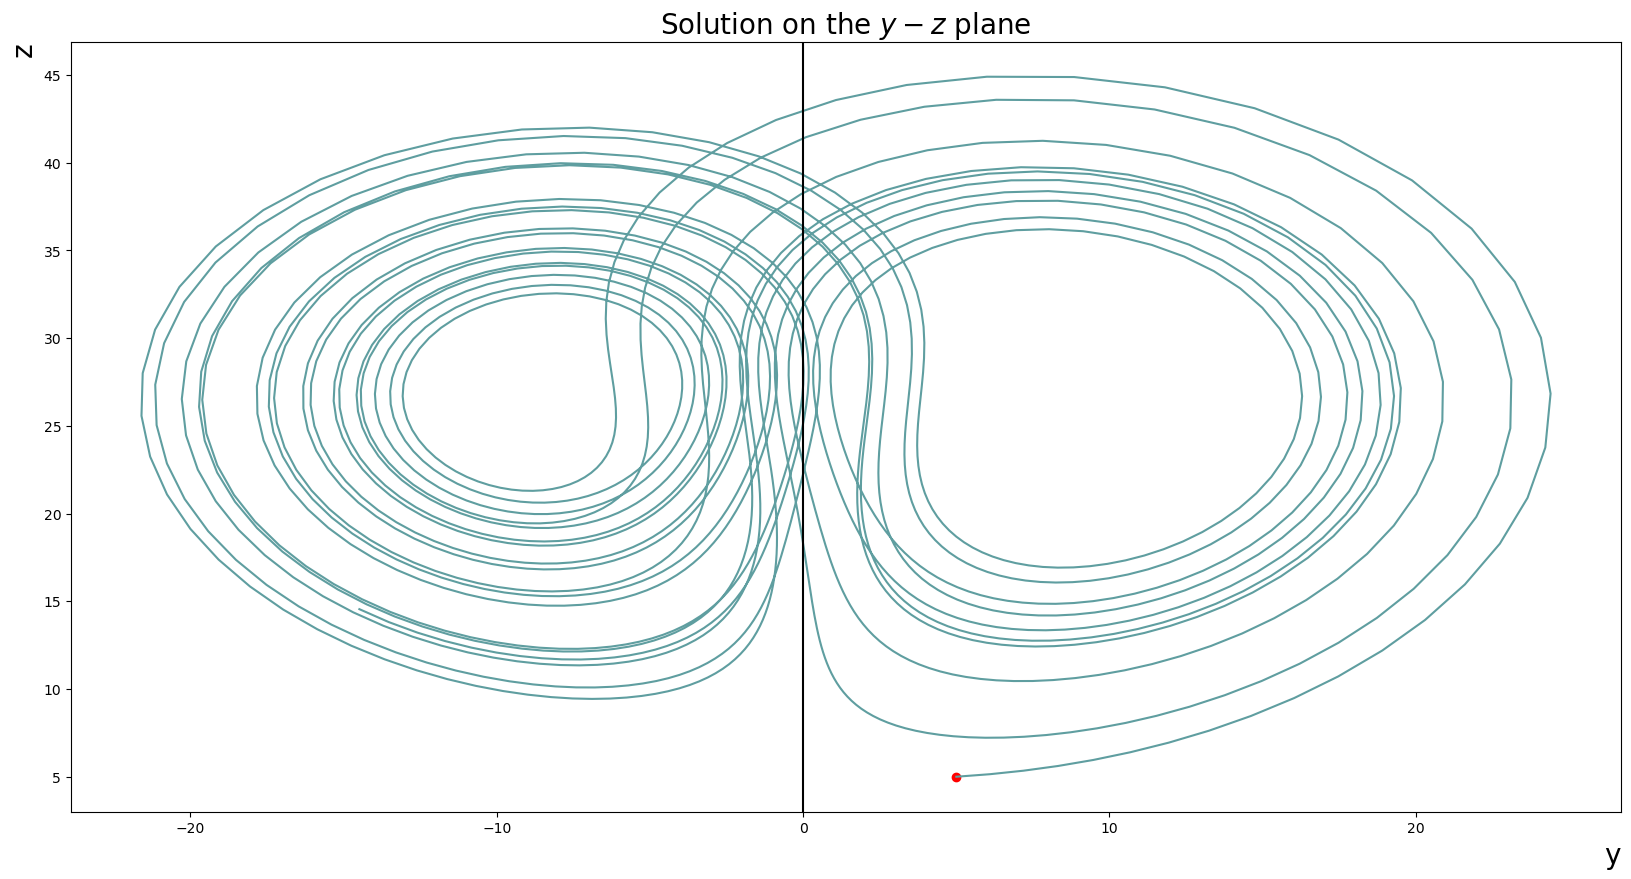

In [16]:
plt.figure(figsize = (20,10))
plt.plot(y,z,color = 'cadetblue',linestyle = 'solid');
plt.scatter(5,5, color = 'red')
plt.axvline(x=0, c='black')
plt.title('''Solution on the $ y - z $ plane''',fontsize=20)
plt.xlabel('y',fontsize = 20,loc='right')
plt.ylabel('z', fontsize = 20,loc='top');

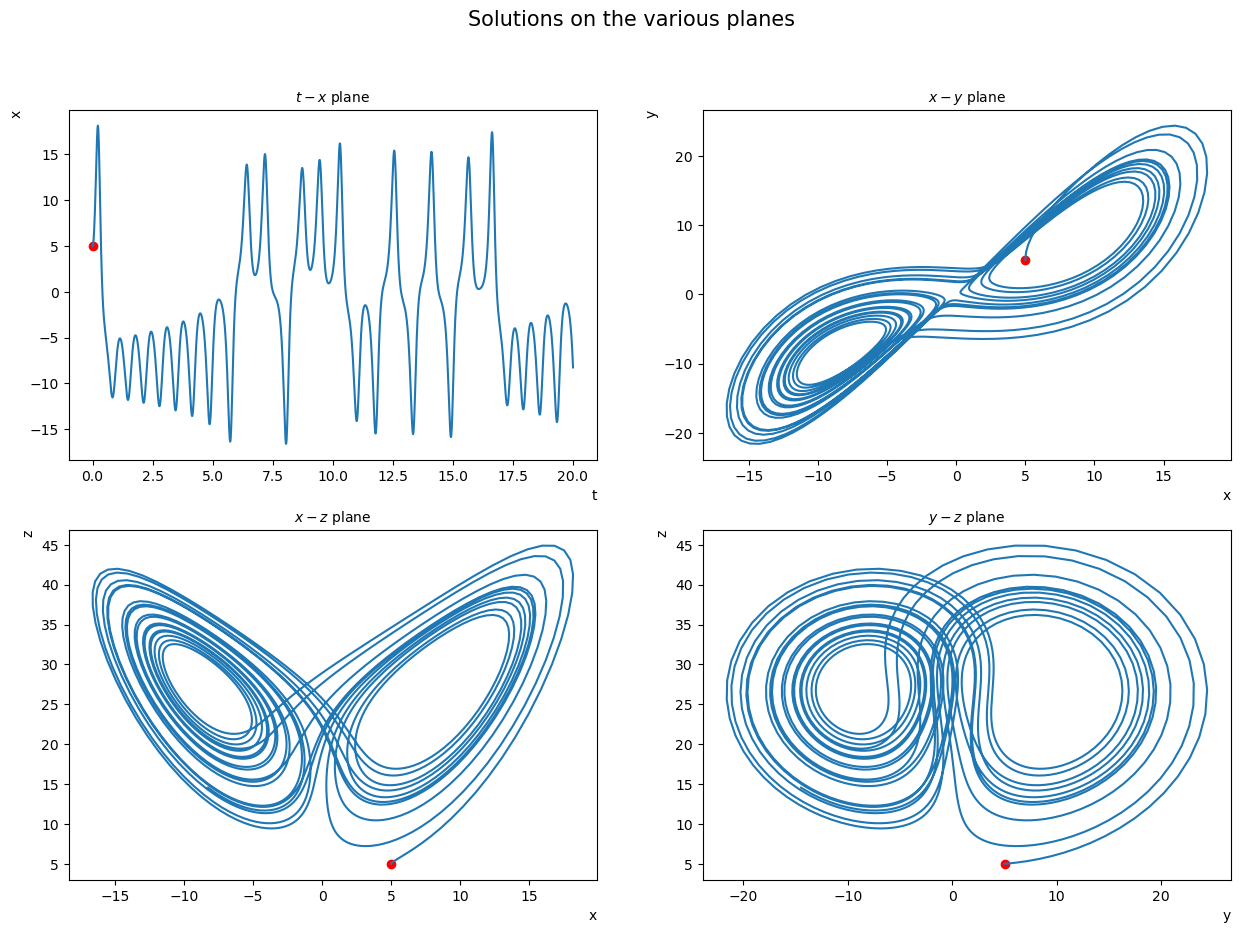

In [17]:
# all plots

plt.figure(figsize = (15,10))

plt.subplot(2,2,1)
plt.plot(t,x);
plt.scatter(0,5, color = 'red')
plt.title('$t-x$ plane', fontsize = 10)
plt.xlabel('t',loc='right')
plt.ylabel('x',loc='top')

plt.subplot(2,2,2)
plt.plot(x,y);
plt.scatter(5,5, color = 'red')
plt.title('$x-y$ plane', fontsize = 10)
plt.xlabel('x',loc='right')
plt.ylabel('y',loc='top')

plt.subplot(2,2,3)
plt.plot(x,z);
plt.scatter(5,5, color = 'red')
plt.title('$x-z$ plane', fontsize = 10)
plt.xlabel('x',loc='right')
plt.ylabel('z',loc='top')

plt.subplot(2,2,4)
plt.plot(y,z);
plt.scatter(5,5, color = 'red')
plt.title('$y-z$ plane', fontsize = 10)
plt.xlabel('y',loc='right')
plt.ylabel('z',loc='top')

plt.suptitle('Solutions on the various planes',fontsize=15);


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6eaebf27-9410-4b3d-9281-dcfa0e4a4299' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>